# <span style="color:blue"> 이토록 쉬운 통계 & R </span>

<img src="../image/cover.png" width="200" height="400" align="left">  임경덕 지음

## PART 4 데이터 분석 도구, R

## 23-95% R로 분석 다시보기-4-연속형변수 관계-2 (59일차)

   * 데이타프로젝트 (http://dataproject.xyz) 또는 (http://cafe.naver.com/dataartproject) 에 미리 저장된 스크립트를 다운 받을 수 있습니다.
   * 스크립트를 활용하면 직접 명령어를 입력하지 않고 저장된 명령어들을 실행할 수 있습니다.

### 데이터 파일은 dataartproject.xyz 에 있습니다.

# 두개의 연속형 변수의 관계 찾기

## 과연 아빠의 키는 아들 키에 얼마나 큰 영향을 줄까?

예전에 피어슨 통계학자가 아빠키와 아들키의 관계에 관심을 가지고 1978쌍의 키 데이터를 모았습니다. 이제 이것을 가지고 분석하고자 합니다.

먼저 read.csv() 함수로 데이터를 불러오기로 합니다.

### 1. 파일 읽기

In [46]:
# 파일 읽기
heights <- read.csv("Practice/data/heights.csv")

cat("변수이름들=", names(heights), "\n")
head(heights) 

## 원래 파일을 사용하려면 father.son 데이터를 가져와야 합니다.
#install.packages("UsingR")
#library(UsingR)
#data(father.son)


변수이름들= father son 


father,son
165.2,151.8
160.7,160.6
165.0,160.9
167.0,159.5
155.3,163.3
160.1,163.2


### 2. 데이터 요약

In [80]:
cat("아빠 평균키=",mean(heights$father), "\n")
cat("아빠 중간값=",median(heights$father), "\n")
cat("아빠 최댓값=",max(heights$father), "\n")
cat("아빠 최솟값=",min(heights$father), "\n")
cat("아빠 최솟값=",min(heights$father), "\n")
cat("아빠 범위=",range(heights$father), "\n")
cat("아빠 사분위=",quantile(heights$father), "\n\n")

cat("아빠 분산=",var(heights$father), "\n")
cat("아빠 표준편차=",sd(heights$father), "\n\n\n")


cat("아들 평균키=",mean(heights$son), "\n")
cat("아들 중간값=",median(heights$son), "\n")

cat("아들 최댓값=",max(heights$son), "\n")
cat("아들 최솟값=",min(heights$son), "\n")
cat("아들 최솟값=",min(heights$son), "\n")
cat("아들 범위=",range(heights$son), "\n")
cat("아들 사분위=",quantile(heights$son), "\n\n")

cat("아들 분산=",var(heights$son), "\n")
cat("아들 표준편차=",sd(heights$son), "\n\n\n")

아빠 평균키= 171.9252 
아빠 중간값= 172.1 
아빠 최댓값= 191.6 
아빠 최솟값= 149.9 
아빠 최솟값= 149.9 
아빠 범위= 149.9 191.6 
아빠 사분위= 149.9 167.1 172.1 176.8 191.6 

아빠 분산= 48.61361 
아빠 표준편차= 6.972346 


아들 평균키= 174.4572 
아들 중간값= 174.3 
아들 최댓값= 199 
아들 최솟값= 148.6 
아들 최솟값= 148.6 
아들 범위= 148.6 199 
아들 사분위= 148.6 170 174.3 179 199 

아들 분산= 51.1327 
아들 표준편차= 7.150713 




### 요약용 그래프

QQ 그래프를 보면 아들키와 아빠키는 정규 분포를 따르는 것 처럼 보입니다.

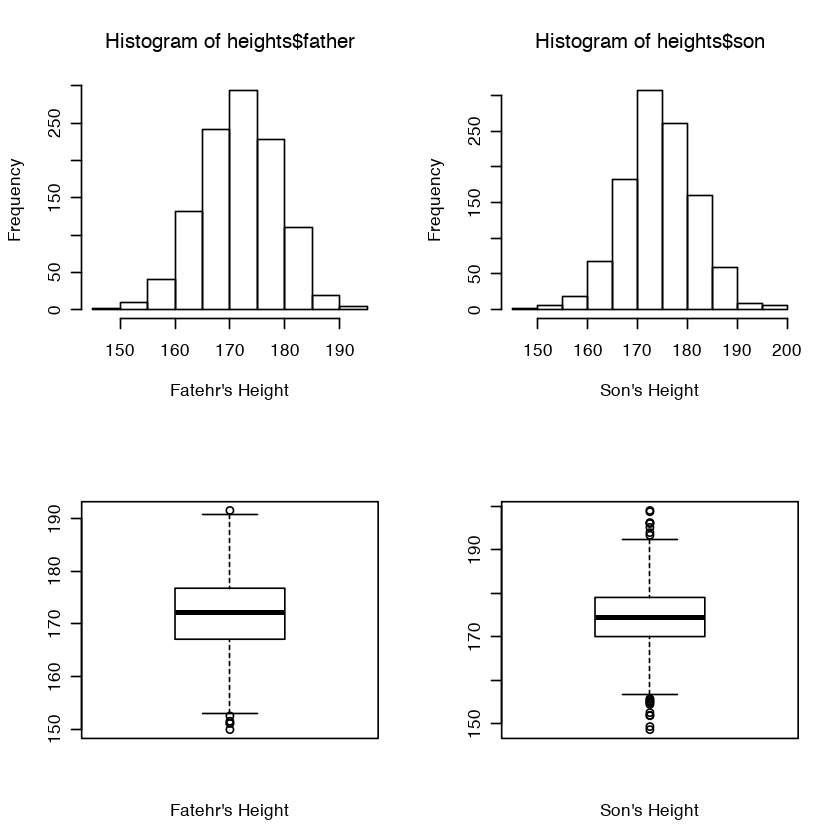

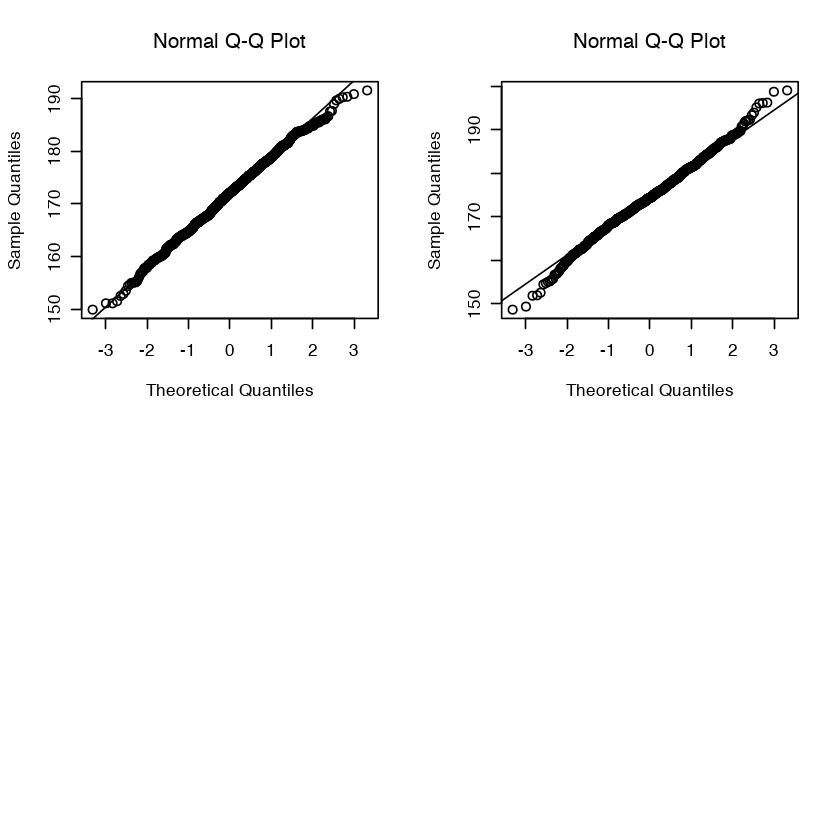

In [44]:
par(mfrow= c(2,2))
hist(heights$father, xlab="Fatehr's Height")
hist(heights$son, xlab="Son's Height")

boxplot(heights$father, xlab="Fatehr's Height")
boxplot(heights$son, xlab="Son's Height")

qqnorm(heights$father)
qqline(heights$father)
qqnorm(heights$son)
qqline(heights$son)

cat("QQ 그래프를 보면 아들키와 아빠키는 정규 분포를 따르는 것 처럼 보입니다.")

### 3. 아빠키와 아들키 관계 분석

R 에서는 산점도는 plot 또는 ggplot2 를 을 이용하여 그릴수 있습니다. 여기서는 두가지를 다 이용하요 그릴 예정입니다.

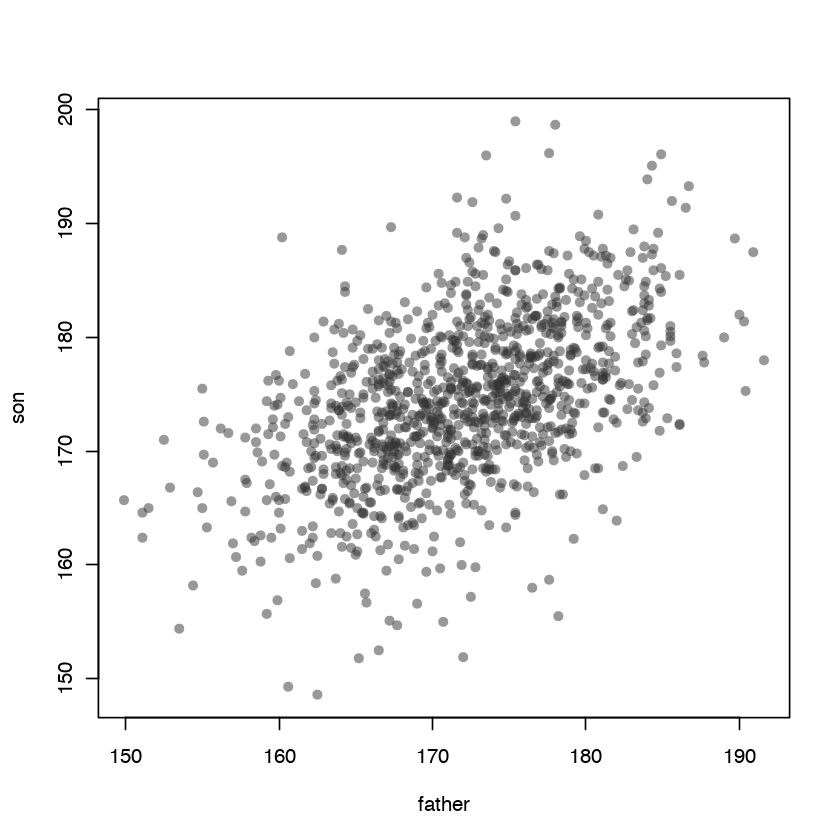

In [2]:
# plot 을 이용하여 그리는 경우
plot(heights, pch=16, col=rgb(0.2,0.2,0.2,0.5))

ggplot2 를 이용하여 그리는 경우는 다음과 같습니다.

In [47]:
library(ggplot2)

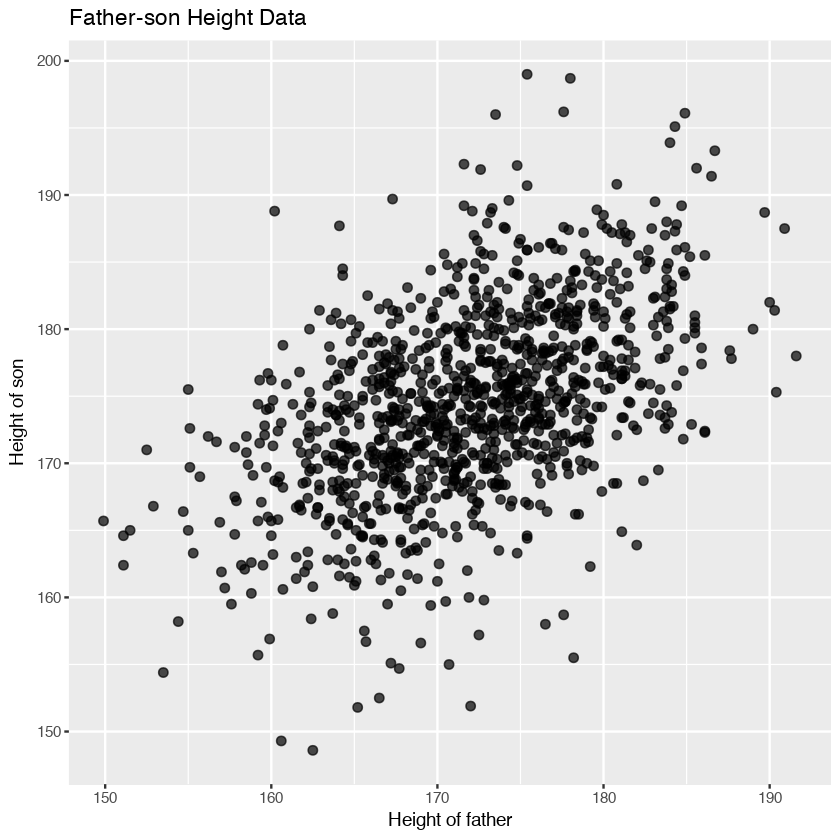

In [50]:
ggplot(heights, aes(x=father, y=son)) + 
   geom_point(size=2, alpha=0.7) + 
   xlab("Height of father") + 
   ylab("Height of son") + 
   ggtitle("Father-son Height Data")

height 변수는 다음과 같습니다. 

In [3]:
summary(heights)

     father           son       
 Min.   :149.9   Min.   :148.6  
 1st Qu.:167.1   1st Qu.:170.0  
 Median :172.1   Median :174.3  
 Mean   :171.9   Mean   :174.5  
 3rd Qu.:176.8   3rd Qu.:179.0  
 Max.   :191.6   Max.   :199.0  

plot() 함수의 첫번쨰 변수로 heights 를 넣으면 height 의 첫번째 변수 father 가로축으로 son 이 세로축으로 하여 2차원 공간에 점을 찍습니다. 찍히는 점 들이 만들어 내는 패턴을 이용하여 두 변수 사이의 관계를 찿아냅니다.

이번에는 먼저 시간의 히스토그램과 같이 그래프를 보면 패턴을 이해하기 위해 산점도에 히스토그램을 같이 표현해보기로 합니다.

In [21]:
scatterhist = function(x, y, xlab="", ylab=""){
  zones=matrix(c(2,0,1,3), ncol=2, byrow=TRUE)
  layout(zones, widths=c(4/5,1/5), heights=c(1/5,4/5))
  xhist = hist(x, plot=FALSE)
  yhist = hist(y, plot=FALSE)
  top = max(c(xhist$counts, yhist$counts))
  par(mar=c(3,3,1,1))
  plot(x,y)
  par(mar=c(0,3,1,1))
  barplot(xhist$counts, axes=FALSE, ylim=c(0, top), space=0)
  par(mar=c(3,0,1,1))
  barplot(yhist$counts, axes=FALSE, xlim=c(0, top), space=0, horiz=TRUE)
  par(oma=c(3,3,0,0))
  mtext(xlab, side=1, line=1, outer=TRUE, adj=0, at=.8 * (mean(x) - min(x))/(max(x)-min(x)))
  mtext(ylab, side=2, line=1, outer=TRUE, adj=0, at=(.8 * (mean(y) - min(y))/(max(y) - min(y))))
}

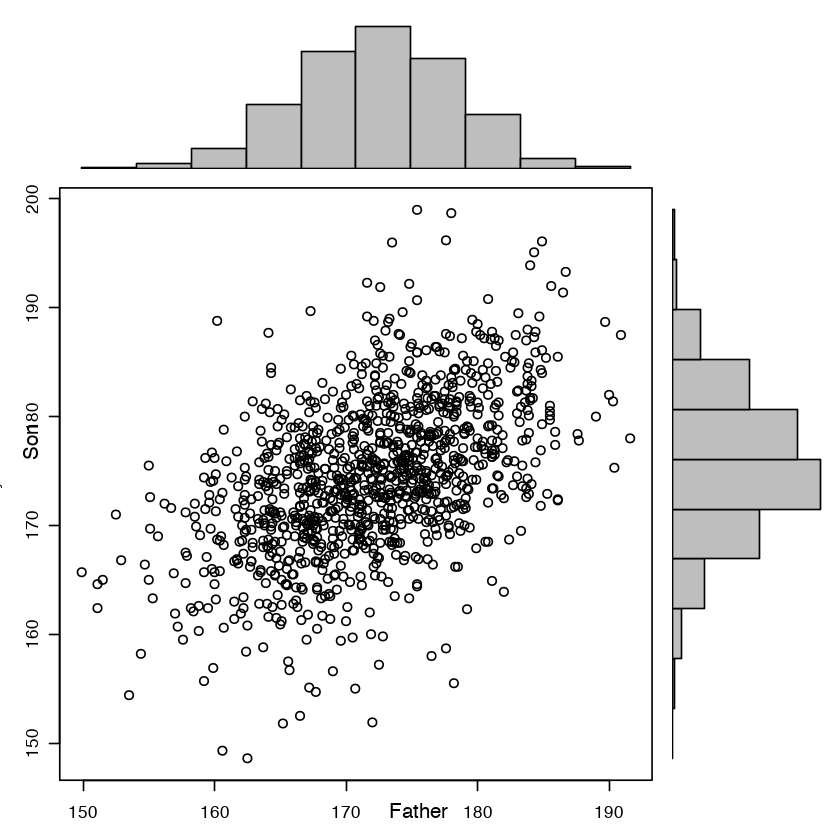

In [22]:
#with(heights, scatterhist(father, son, xlab="Father", ylab="Son"))
scatterhist(heights$father, heights$son, xlab="Father", ylab="Son")


이전에 따로 히스토그램과 산점도 표시보다는 좀더 패턴을 이해하기 쉬울것 같습니다. 

pch 옵션으로 점 모양을 바꾸고,  
col 과 rdb 함수를 이용하여 색깔을 바꾸고, 
효과적인 표현을 의해서 가로, 세로 평균을 추가 해봅니다.
보조선은 abline() 함수를 사용합니다. abline() 함수에서 v 옵션은 수직선, h 옵션은 수평선입니다.
선종류는 lty 에서 2번으로 하여 점선으로 지정했습니다.

In [69]:
scatterhistaline = function(x, y, xlab="", ylab=""){
  zones=matrix(c(2,0,1,3), ncol=2, byrow=TRUE)
  layout(zones, widths=c(4/5,1/5), heights=c(1/5,4/5))
  xhist = hist(x, plot=FALSE)
  yhist = hist(y, plot=FALSE)
  top = max(c(xhist$counts, yhist$counts))
  par(mar=c(3,3,1,1))
  plot(x,y, pch=16, col=rgb(0.2,0.2,0.2,0.5))
  abline(v=mean(x), lty=2)
  abline(h=mean(y), lty=2)
  par(mar=c(0,3,1,1))
  barplot(xhist$counts, axes=FALSE, ylim=c(0, top), space=0)
  par(mar=c(3,0,1,1))
  barplot(yhist$counts, axes=FALSE, xlim=c(0, top), space=0, horiz=TRUE)
  par(oma=c(3,3,0,0))
  mtext(xlab, side=1, line=1, outer=TRUE, adj=0, at=.8 * (mean(x) - min(x))/(max(x)-min(x)))
  mtext(ylab, side=2, line=1, outer=TRUE, adj=0, at=(.8 * (mean(y) - min(y))/(max(y) - min(y))))
}

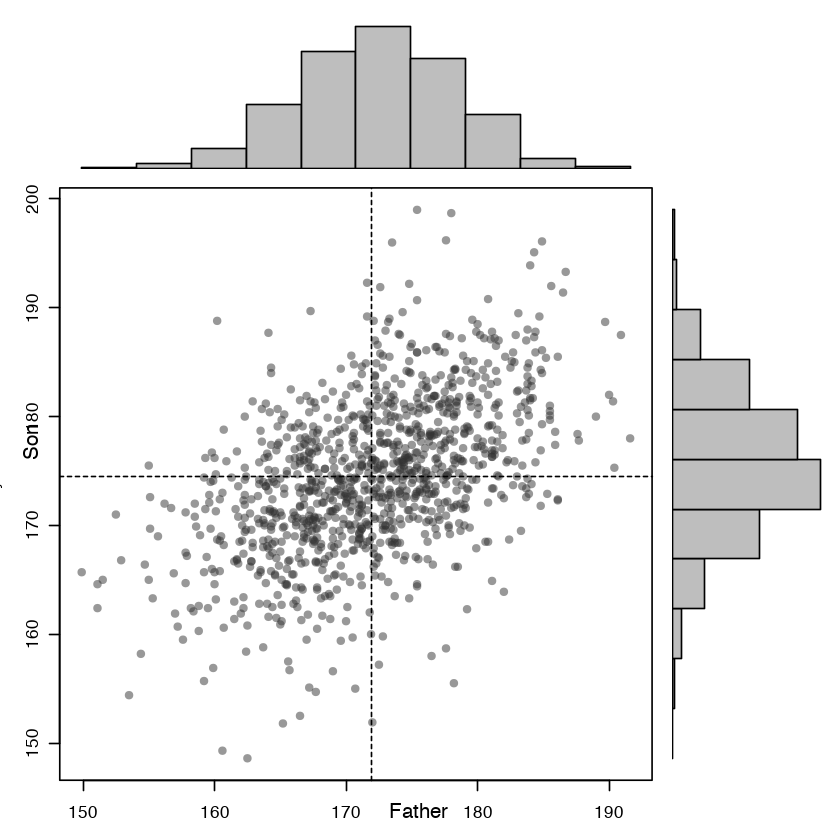

In [70]:
with(heights, scatterhistaline(father, son, xlab="Father", ylab="Son"))

아빠키와 아들키의 평균에서 히스토그램이 가장 크게 됩니다. 이것은 데이터 개요에서 살며보면 아들키 및 아빠키 가 정규분포형태를 가지고 있는것에서 유추 할 수 있습니다.

아빠키와 아들키 평균키에 그은 2개의 보조선은 2차원 평편을 4등분 합니다. 오른쪽 방향에서 반시계 방향으로 제 1사분면, 2, 3, 4 분면이라고 합니다.
* 1사분면은 아빠키, 아들키 둘다 큰 가족입니다.
* 3사분면은 아빠키, 아들키 둘다 작은 가족입니다.
* 2, 4 분면은 각각 아들키가 크면 아빠키가 작고, 아빠키가 크면 아들키가 작은 가족입니다.

* 전체적으로는 1, 3 분면에 관측치가 많아 보입니다. 즉 앙의 상관관계를 가지고 있습니다.

#### 공분산 /상관관계


공분산 : 두 변량이 각각의 평균으로 부터 변화하는 방향및 양에 대한 기대갑으로   

모집단 공붆산 : $Cov(X,Y) = \sigma_{XY} = E[(X-\mu_x)(Y-\mu_y)]$  
샘플 공분산  : $S_{XY} = \dfrac{1}{n-1}\sum_{n=1}^{n}(x_i - \bar x)(y_i - \bar y)$

아빠키와 아들키 공분산 관계는 ?


In [71]:
cov(heights)

,father,son
father,48.61361,24.98318
son,24.98318,51.13270


In [73]:
# 또는 
with(heights, cov(x=father, y=son))
# 또는 cov(heights$father, heights$son)

[1] 24.98318

즉 공분산이 + 이므로 아빠키가 큰 경우에는 대체적으로 아들키도 클것으로 예상합니다.  그러나 24.98 이라는 숫자가 무엇인지는 알 수 없습니다. 이것을 표준화된 공분산 형태로 변환해 보자.

모집단 상관계수 : $\rho = \dfrac{Cov(X,Y)}{\sigma_Y \sigma_Y}$  
표본집단 상관계수 : $r = \dfrac{S_{XY}}{S_XS_Y} = \dfrac{\sum_{i=1}^n(x_i-\bar x)(y_i - \bar y)}{\sqrt{\sum_{i=1}^n(x_i - \bar x)^2}\sqrt{\sum_{i=1}^n(y_i - \bar y)^2}}$

* 상관계수는 -1 에서 1 사이 값을 가진다.
* +1 에 가까우면 강한 양의 선형관계를 -1 에 가까우면 강한 음의 선형관계를 가진다.
* 0 이면 선형관계가 거의 없다.


In [74]:
cor(heights)

,father,son
father,1.0000000,0.5010942
son,0.5010942,1.0000000


In [75]:
# 또다른 방법으로
with(heights, cor(x=father, y=son))

[1] 0.5010942

즉 상관계수가 0.5 정도 값을 가지고 있습니다.

corrplot() 함수를 사용하여 관계를 살펴 보자. 사실 변수2 개 father, son 이라서 다양한 형태를 기대하기는 힘들다.

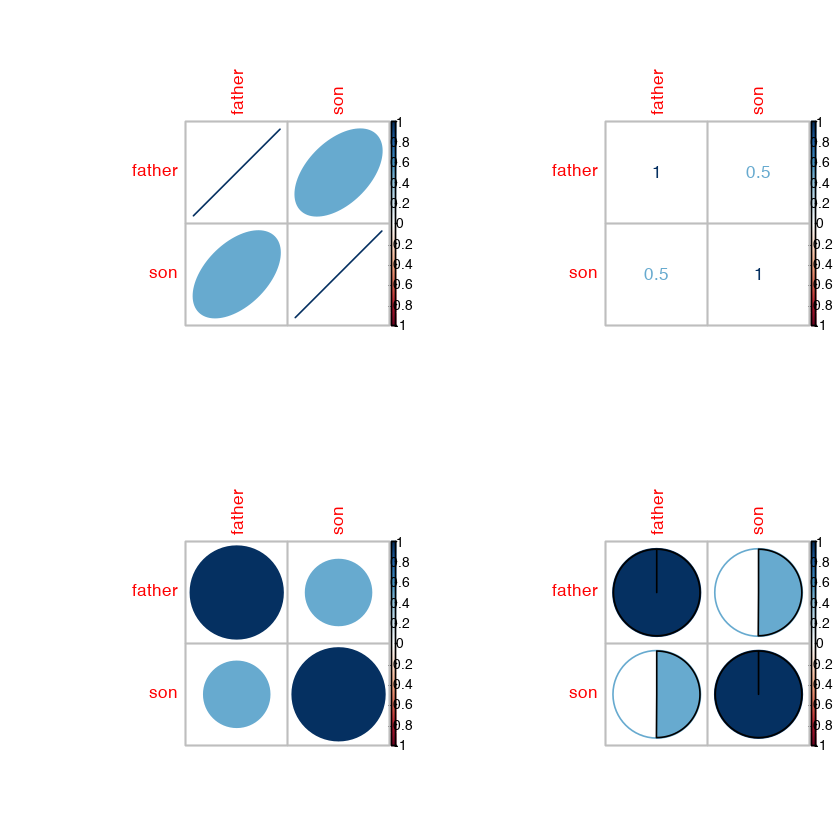

In [79]:
library(corrplot)
par(mfrow=c(2,2))
corrplot(cor(heights), method="ellipse")
corrplot(cor(heights), method="number")
corrplot(cor(heights), method="circle")
corrplot(cor(heights), method="pie")

다음은 선형 회귀 식을 이용하여 좀더 자세하게 관계를 분석해보도록 하자.